In [1]:
%set_env GOOGLE_APPLICATION_CREDENTIALS=google-credentials.json

env: GOOGLE_APPLICATION_CREDENTIALS=google-credentials.json


In [3]:
import DB_Control
from StockMarket.market import StockMarket

db = DB_Control.initialise_database()
stonks = StockMarket(db)

	Inicializando submódulo StockMarket.market
	Módulo cargado con éxito


In [4]:
from datetime import datetime
# Generar una hora de datos aleatorios
for sym, doc in stonks.stock_refs.items():
    for i in range(60):
        current, new, change = stonks.calculate_price_change(sym)
        stonks.price_to_history(sym, current, change)
        stonks.set_stock_price(sym, new)
        print(f"Price for {sym}: {new} ({round(change*100, 2)}% change)")
    
    history, tot_change = stonks.get_price_history(sym, 60)
    print(f"En este tiempo, {sym} cambió en {round(tot_change*100, 2)}%\n")
        

ge)
Price for WMT: 133.21766528697648 (-0.5% change)
Price for WMT: 132.95122995640253 (-0.2% change)
Price for WMT: 131.75466888679492 (-0.9% change)
Price for WMT: 132.01817822456852 (0.2% change)
Price for WMT: 131.88616004634395 (-0.1% change)
Price for WMT: 132.14993236643664 (0.2% change)
Price for WMT: 133.33928175773457 (0.9% change)
Price for WMT: 133.8726388847655 (0.4% change)
Price for WMT: 132.6677851348026 (-0.9% change)
Price for WMT: 133.46379184561144 (0.6% change)
Price for WMT: 134.53150218037632 (0.8% change)
Price for WMT: 135.2041596912782 (0.5% change)
Price for WMT: 134.39293473313052 (-0.6% change)
Price for WMT: 134.66172060259677 (0.2% change)
Price for WMT: 135.73901436741755 (0.8% change)
Price for WMT: 134.3816242237434 (-1.0% change)
Price for WMT: 133.30657122995345 (-0.8% change)
Price for WMT: 133.30657122995345 (0.0% change)
Price for WMT: 132.9066515162636 (-0.3% change)
Price for WMT: 133.43827812232865 (0.4% change)
Price for WMT: 132.9045250098393

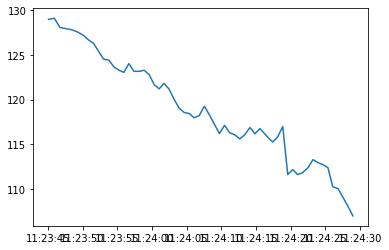

In [5]:
import matplotlib.pyplot as plt

history, change = stonks.get_price_history("AAPL", 60)

prices = [doc.to_dict()["price"] for doc in history]
dates = [doc.to_dict()["timestamp"] for doc in history]

plt.plot(dates, prices)